# Concrete Compressive Strength

The dataset used in this analysis is from the UCI Machine Learning Repository:

Yeh,I-Cheng. (2007).   
Concrete Compressive Strength.   
UCI Machine Learning Repository.   
https://doi.org/10.24432/C5PK67.

In [2]:
cat Concrete_Readme.txt

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitat

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from linear_regression import LinearRegression

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

In [5]:
df_concrete = pd.read_excel('Concrete_Data.xls')

## Data Exploration

In [6]:
print(df_concrete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
print(df_concrete.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


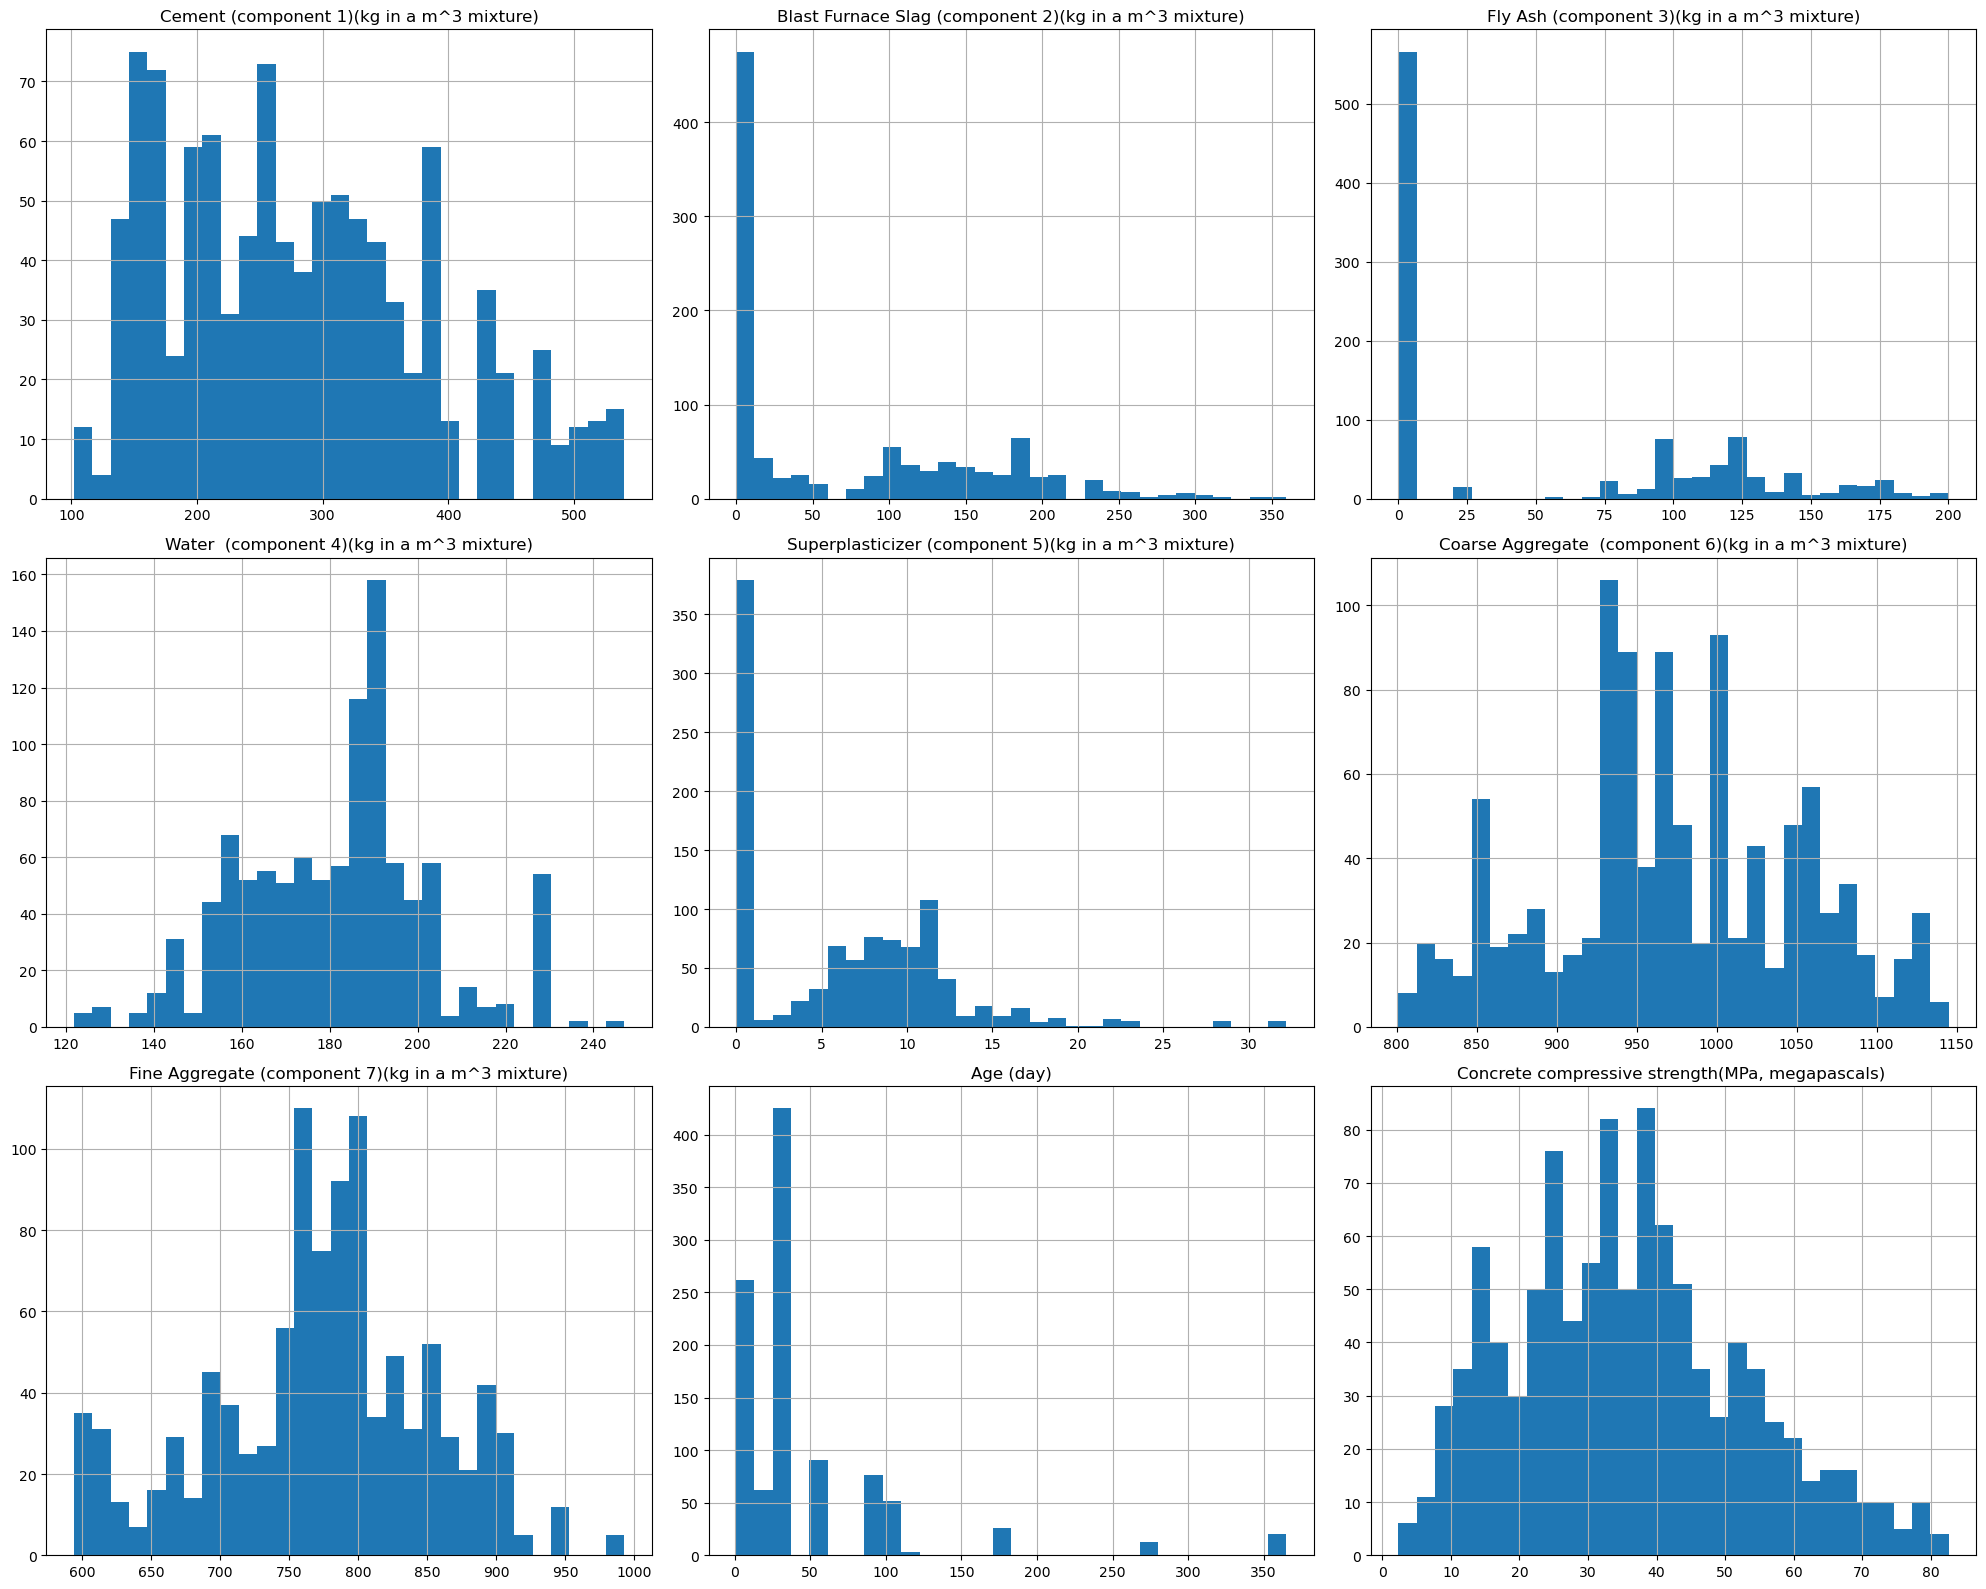

In [8]:
df_concrete.hist(bins=30, figsize=(20, 16))
plt.tight_layout()
plt.show()

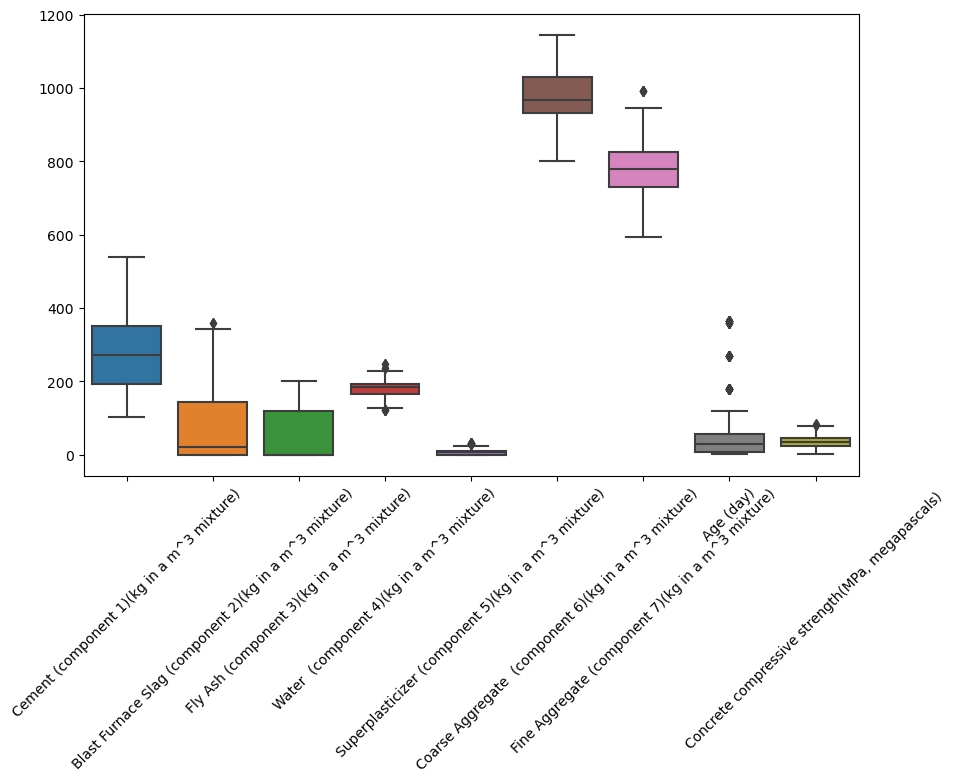

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_concrete)
plt.xticks(rotation=45)
plt.show()

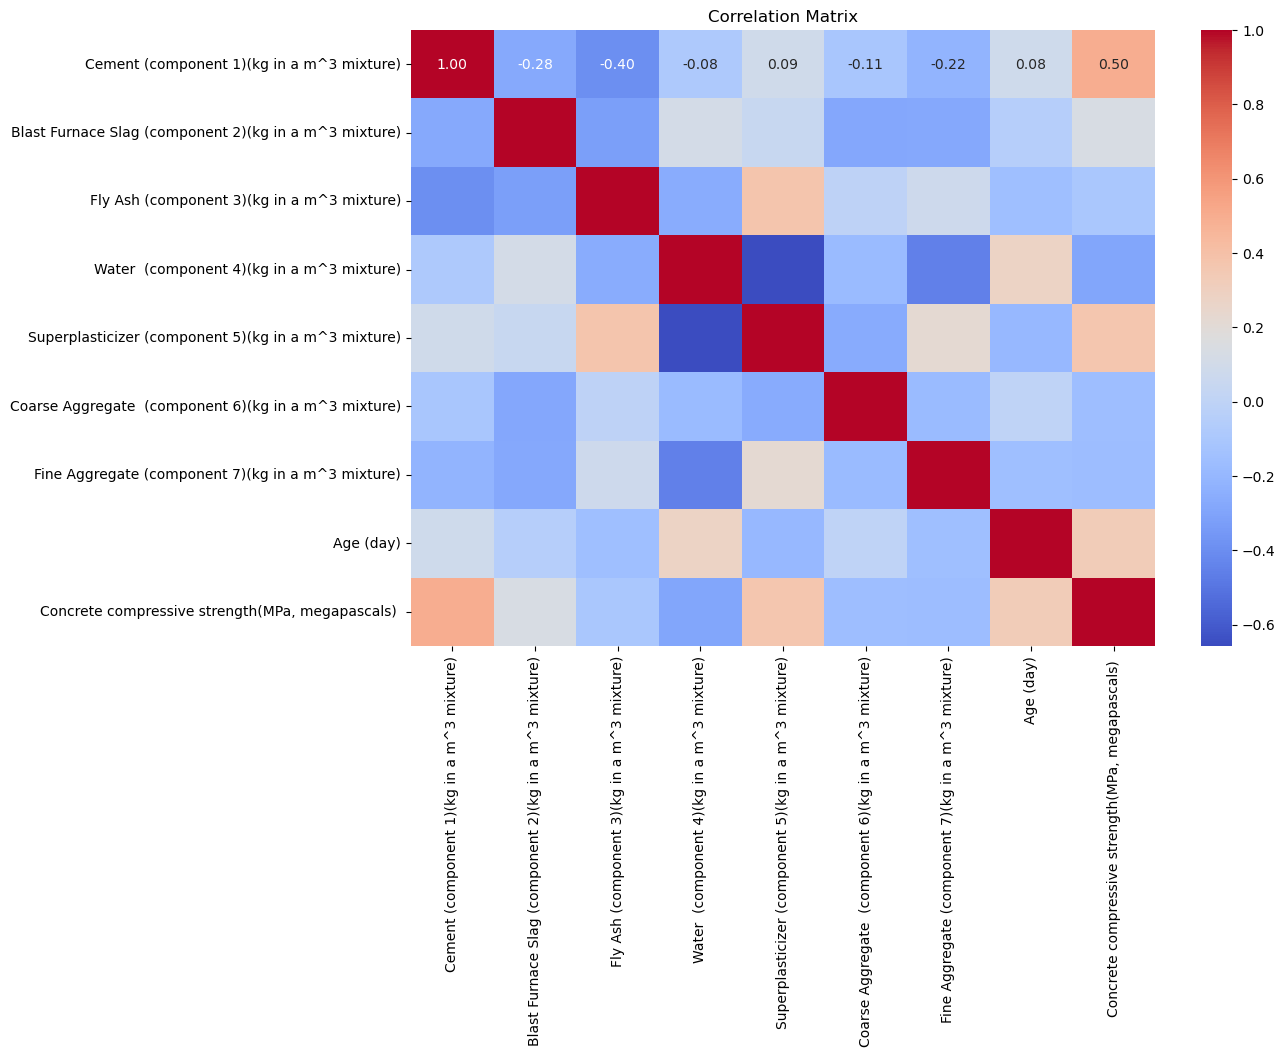

In [10]:
correlation_matrix = df_concrete.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [19]:
concrete = df_concrete.to_numpy()

In [20]:
X = concrete[:,:8] 
X = PolynomialFeatures(degree=2).fit_transform(X)
y = concrete[:, 8]

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X,y)

## Model Fitting

In [22]:
model = LinearRegression()
W,b = model.fit(X, y, epochs=1000*5, alpha=0.009, error_threshold=-10, validation_size=0.4, output_limit=10)

(0/10) > Epoch: 0 cost: 1623.43230408 vCost: 1123.21507915
(1/10) > Epoch: 500 cost: 84.56088595 vCost: 60.86866552
(2/10) > Epoch: 1000 cost: 79.80116867 vCost: 58.18129252
(3/10) > Epoch: 1500 cost: 77.33073711 vCost: 56.82214311
(4/10) > Epoch: 2000 cost: 75.80438153 vCost: 56.08199363
(5/10) > Epoch: 2500 cost: 74.77893427 vCost: 55.78320070
(6/10) > Epoch: 3000 cost: 74.04797720 vCost: 55.78343180
(7/10) > Epoch: 3500 cost: 73.49877608 vCost: 55.97519282
(8/10) > Epoch: 4000 cost: 73.06557737 vCost: 56.28410531
(9/10) > Epoch: 4500 cost: 72.70879930 vCost: 56.66154414
       * Epoch: 4594 vCost: 56.73662498

Terminated! Returned: Weights: [ 5.4382e-02  2.1039e+00  3.7332e-01 -5.5925e-01 -8.5508e-01  1.6222e+00
 -5.5227e-01 -2.2212e-01  3.8040e+00  1.0731e+00  3.0103e-01  3.4403e-01
 -1.2072e+00 -1.5708e+00  4.6582e+00  2.5135e+00  4.7529e-01 -9.3732e-01
  9.1872e-01  1.4927e+00  2.3825e+00 -8.4929e-03  2.0640e+00  1.3989e+00
  1.7035e-02  1.4114e-02  6.6410e-01 -2.1899e+00  2.0714

## Model Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = y
y_pred = np.dot(X, W) + b

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)
print(f'R-squared: {r_squared}')

Mean Absolute Error (MAE): 6.379774231594595
Mean Squared Error (MSE): 66.25990890314061
Root Mean Squared Error (RMSE): 8.140018974372271
R-squared: 0.7623463925842637
